In [3]:
import sys,os
# get utils path (one fodelr up)
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def par_value_minus_mean_box_plot(df_x,x_true):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    xx=df_x.copy()
    xx.loc[len(df_x.index)] = pd.Series(x_true, index=df_x.columns)
    
    fig, ax = plt.subplots(1,2,figsize=(14, 4))
    
    ax[0].boxplot((xx-xx.iloc[-1]).iloc[:-1,:].values, labels=xx.columns);
    ax[0].plot(np.zeros(len(xx.columns)+2),'--',color='black',alpha=0.5)
    ax[0].set_xticks(range(1, len(xx.columns) + 1))
    ax[0].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    ax[0].set_xlim([0,len(xx.columns)+1])
    ax[0].set_ylabel('Modeled-Observed', fontsize=12)
            
    std_devs = np.std((xx-xx.iloc[-1]).iloc[:-1,:], axis=0)
    ax[1].bar(range(1, len(xx.columns) + 1), std_devs, tick_label=xx.columns)
    ax[1].set_xticks(range(1, len(xx.columns) + 1))
    ax[1].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    #ax[1].set_title("Standard Deviation of Parameters' Deviations", fontsize=14)
    #ax[1].set_xlabel('Parameter', fontsize=12)
    ax[1].set_ylabel('Standard Deviation', fontsize=12)

def rmse(x_mean,x_true):
    MSE = np.square(np.subtract(x_mean,x_true)) 
    return np.sqrt(MSE)

In [7]:
case=2510
if case==20:
    path='20_percent/csv-files/'
    model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
elif case==10:
    path='10_percent/csv/'
    model='out-cmax-gpp-md1-r-10-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-10-EJ.finalresults.csv'
elif case==50:
    path='50_percent/csv/'
    model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
elif case==90:    
    path='90_percent/csv/'
    model='out-cmax-gpp-md1-r-90-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-90-EJ.finalresults.csv'
elif case==1010: 
    path='10_10_percent/'
    model='out-cmax-gpp-md1-r-10-10-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-10-10-EJ.finalresults.csv'   
elif case==2510: 
    path='25_10_percent/'
    model='out-cmax-gpp-md1-r-25-10-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-25-10-EJ.finalresults.csv'   
    
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_header
df_model

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
#xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
GPP_mod_MD1=y_sort.mean()
GPP_tar_MD1=df_model.iloc[-1,:]
#par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
rmse_GPP_MD1=rmse(y_sort.mean(),df_model.iloc[-1,:]) 

cmax_true_params_MD1 = [381.19, 113.93, 210.48, 93.31]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
cmax_opt_MD1=x_sort.mean()
#par_value_minus_mean_box_plot(x_sort,cmax_true_params)
rmse_cmax_MD1=rmse(x_sort.mean(),cmax_true_params_MD1)
rmse_cmax_MD1

cmax0    0.047172
cmax1    0.669747
cmax2    1.755883
cmax3    0.178853
dtype: float64

In [8]:
if case==10:
    model='out-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
elif case == 20:
    model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
elif case == 50:
    model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
elif case==90: 
    model='out-nmax-krb-npp-vegc-md1-r-90-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-90-EJ.finalresults.csv'
elif case==1010: 
    path='10_10_percent/'
    model='out-nmax-krb-npp-vegc-md1-r-10-10-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-10-10-EJ.finalresults.csv'   
elif case==2510: 
    path='25_10_percent/'
    model='out-nmax-krb-npp-vegc-md1-r-25-10-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-25-10-EJ.finalresults.csv'   

df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header
df_model.head()

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order).iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(y_sort[:5],df_model.iloc[-1,:])
rmse_nmax_krb_VEGC_MD1=rmse(y_sort.mean(),df_model.iloc[-1,:]) 

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(x_sort,nmax_krb_true_params)
rmse_nmax_krb_MD1=rmse(x_sort.mean(),nmax_krb_true_params) 

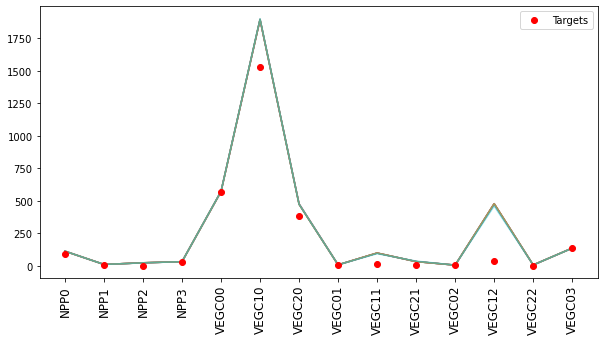

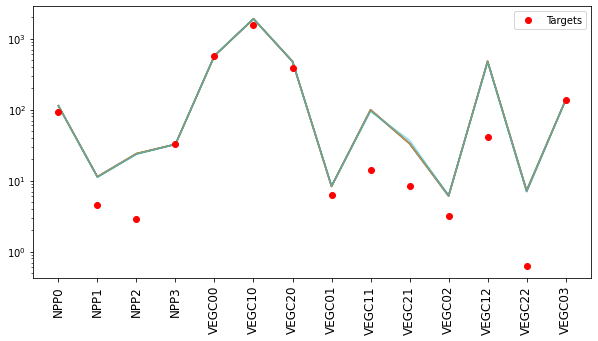

In [9]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [10]:
if case==10:
    model='out-cfall-vegc-md1-r-10-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-10-EJ.finalresults.csv'
elif case == 20:
    model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
elif case == 50:
    model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
elif case == 90:
    model='out-cfall-vegc-md1-r-90-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-90-EJ.finalresults.csv'
elif case==1010: 
    path='10_10_percent/'
    model='out-cfall-vegc-md1-r-10-10-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-10-10-EJ.finalresults.csv' 
elif case==2510: 
    path='25_10_percent/'
    model='out-cfall-vegc-md1-r-25-10-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-25-10-EJ.finalresults.csv' 

df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = param_header
df_model.head()

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
rmse_cfall_VEGC_MD1 = rmse(y_sort.mean(),df_model.iloc[-1,:]) 

cfall_true_params = [0.001107,0.050722, 0.024987, 0.019928, 0.003407, 0.004790, 
                     0.003590, 0.005149, 0.001171, 0.026025]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(x_sort,cfall_true_params)
rmse_cfall_MD1 = rmse(x_sort.mean(),cfall_true_params) 

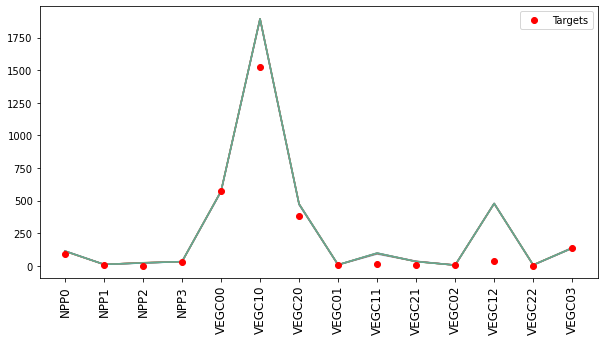

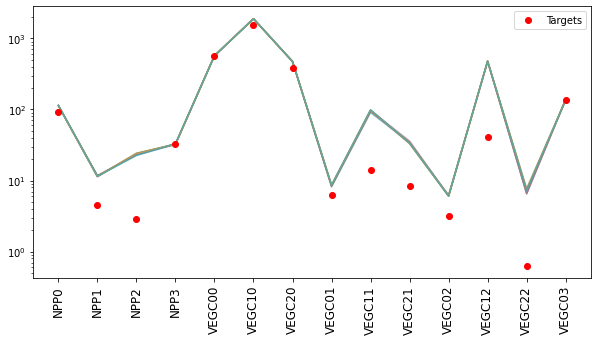

In [11]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [34]:
if case==10:
    model='out-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
elif case == 20:
    model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
elif case == 50:
    model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
elif case == 90:
    model='out-nfall-npp-vegc-vegn-md1-r-90-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-90-EJ.finalresults.csv'
elif case==1010: 
    path='10_10_percent/'
    model='out-nfall-npp-vegc-vegn-md1-r-10-10-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-10-10-EJ.finalresults.csv' 
elif case==2510:
    path='25_10_percent/'
    model='out-nfall-npp-vegc-vegn-md1-r-25-10-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-25-10-EJ.finalresults.csv' 

df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGN20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
rmse_nfall_VEGC_MD1 = rmse(y_sort.mean(),df_model.iloc[-1,:]) 

nfall_true_params = [0.010242, 0.044555, 0.017748, 0.007250, 0.001343, 0.001424, 
                     0.005220, 0.003280, 0.007283, 0.007607]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(x_sort,nfall_true_params)
rmse_nfall_MD1 = rmse(x_sort.mean(),nfall_true_params)

In [39]:
df_model.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,93.567775,4.628196,2.888012,32.300809,571.677222,1552.308960,391.710748,6.280936,16.602394,10.000924,...,0.452826,0.268843,0.300541,1.103276,0.013951,1.143901,603.090821,1160.334425,4698.079929,15.845005
1,94.260178,4.749605,2.897445,32.304152,571.731842,1563.720496,394.004221,6.337105,19.214483,12.476190,...,0.538115,0.325934,0.300542,1.128786,0.013877,1.143950,603.312823,1182.977861,4708.238011,15.806388
2,94.834242,4.765225,2.912448,32.303909,571.545538,1581.911353,398.539288,6.329857,19.317984,11.637135,...,0.535727,0.304391,0.301120,1.134759,0.014050,1.143892,593.295349,1181.216592,4288.295187,15.485707
3,90.946902,4.425378,2.735276,32.301795,571.363531,1532.969556,385.976099,6.207589,16.536434,11.475006,...,0.469877,0.303826,0.292714,1.083119,0.012912,1.143874,599.776863,1179.743392,4506.878689,13.535532
4,97.728217,5.090667,3.097008,32.298354,573.130341,1609.333679,405.974258,6.446268,20.538413,8.063265,...,0.544739,0.202418,0.310850,1.177230,0.015074,1.143747,608.535727,1135.937649,4892.474137,18.238941


In [40]:
case=2510
#path='20_percent/csv-files/'
if case==10:
    model='out-test_csoil_consil.csv'
    params='param-test_csoil_consil.csv'
elif case == 20:
    model='out-csoil-md1-r-EJ.finalresults.csv'
    params='param-csoil-md1-r-EJ.finalresults.csv'
elif case == 50:
    model='out-csoil-md1-r-EJ-50.finalresults.csv'
    params='param-csoil-md1-r-EJ-50.finalresults.csv'
    #50% has only 4 outputs
elif case==90:
    #model='out-config-csoil-md1-10-test.csv'
    model='out-csoil-md1-r-EJ-90.csv'
    #params='param-config-csoil-md1-10-test.csv'
    params='param-csoil-md1-r-EJ-90.csv'
elif case==1010:
    model='out-csoil-10-10-res.csv'
    params='param-csoil-10-10-res.csv'
elif case==2510:
    model='out-csoil-25-10-res.csv'
    params='param-csoil-25-10-res.csv'

df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGN20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03',   
                   'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
if case == 50 or case == 90 or case == 1010:
    model_header =  ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
               
df_param.columns = param_header
df_model.head()

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
rmse_soilt_MD1 = rmse(y_sort.mean(),df_model.iloc[-1,:]) 

true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
#par_value_minus_mean_box_plot(x_sort,true_params)
rmse_soilp_MD1 = rmse(x_sort.mean(),true_params) 

In [44]:
rmse_soilp_MD1


micbnup     1.964800e-05
kdcrawc     2.839232e-03
kdcsoma     2.756485e-02
kdcsompr    7.780000e-07
kdcsomcr    1.800000e-08
dtype: float64

Text(0, 0.5, 'RMSE targets')

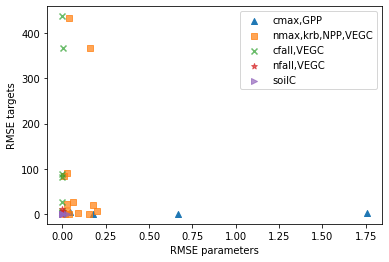

In [42]:
plt.scatter(rmse_cmax_MD1, rmse_GPP_MD1,  marker='^')
plt.scatter(rmse_nmax_krb_MD1, rmse_nmax_krb_VEGC_MD1,  marker='s',alpha=0.7)
plt.scatter(rmse_cfall_MD1, rmse_cfall_VEGC_MD1[4:],  marker='x',alpha=0.7)
plt.scatter(rmse_nfall_MD1, rmse_nfall_VEGC_MD1[-10:],  marker='*',alpha=0.7)
if case == 50 or case == 90 or case == 1010:
    rmse_soilt_MD1.loc[4]=0
    plt.scatter(rmse_soilp_MD1, rmse_soilt_MD1,  marker='>',alpha=0.7)
else:
    plt.scatter(rmse_soilp_MD1, rmse_soilt_MD1[-5:],  marker='>',alpha=0.7)
plt.legend(['cmax,GPP','nmax,krb,NPP,VEGC','cfall,VEGC','nfall,VEGC','soilC'])
plt.xlabel('RMSE parameters')
plt.ylabel('RMSE targets')

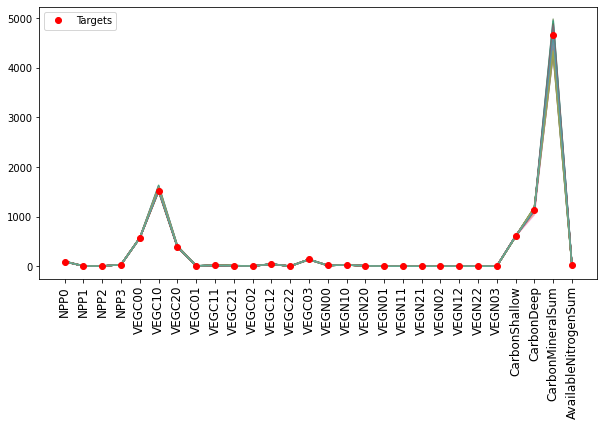

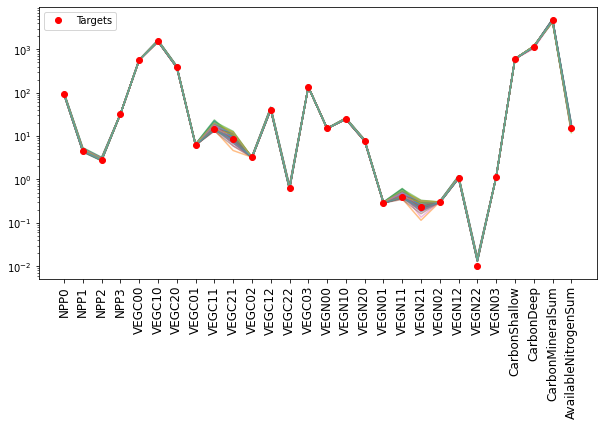

In [43]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)